In [39]:
# --- Import libraries ---
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [13]:
# --- Step 2: Download and load Kaggle dataset safely ---
import os
import kagglehub

path = kagglehub.dataset_download("heptapod/titanic")
print("✅ Dataset downloaded to:", path)

# List files to see exact names
print("\nFiles inside dataset folder:")
print(os.listdir(path))

# --- Step 3: Load the CSV file automatically ---
# Find the first CSV file in that folder
for file in os.listdir(path):
    if file.endswith(".csv"):
        csv_path = os.path.join(path, file)
        break

# Load dataset
df = pd.read_csv(csv_path)
print("\n✅ Loaded file:", csv_path)
display(df.head())

✅ Dataset downloaded to: /Users/vanshitaparab/.cache/kagglehub/datasets/heptapod/titanic/versions/1

Files inside dataset folder:
['train_and_test2.csv']

✅ Loaded file: /Users/vanshitaparab/.cache/kagglehub/datasets/heptapod/titanic/versions/1/train_and_test2.csv


,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [21]:
print(df.columns.tolist())

['Passengerid', 'sibsp', 'Sex', 'Age', 'Fare', '2urvived']


In [23]:
# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

print(df.columns.tolist())

['passengerid', 'sibsp', 'sex', 'age', 'fare', '2urvived']


In [29]:
df = df.rename(columns={'2urvived': 'survived'})

In [31]:
# --- Step 4: Data Preprocessing ---
# Select useful columns
df = df[['passengerid', 'sibsp', 'sex', 'age', 'fare', 'survived']]

In [33]:
# --- Step 4: Handle Missing Values ---
df = df.dropna(subset=['age', 'fare', 'sex', 'survived'])
print("After removing missing values:", df.shape)

After removing missing values: (1309, 6)


In [41]:
# --- Step 5: Encode Categorical Feature ---
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])  # male=1, female=0 (usually)

In [43]:
# --- Step 6: Define Features (X) and Target (y) ---
X = df[['age', 'fare', 'sex', 'sibsp']]
y = df['survived']

In [45]:
# --- Step 7: Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# --- Step 8: Feature Scaling ---
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
# --- Step 9: Train Logistic Regression Model ---
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [51]:
# --- Step 10: Make Predictions ---
y_pred = model.predict(X_test)

In [53]:
# --- Step 11: Evaluate the Model ---
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 0.7862595419847328

Confusion Matrix:
 [[178  11]
 [ 45  28]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.94      0.86       189
           1       0.72      0.38      0.50        73

    accuracy                           0.79       262
   macro avg       0.76      0.66      0.68       262
weighted avg       0.78      0.79      0.76       262



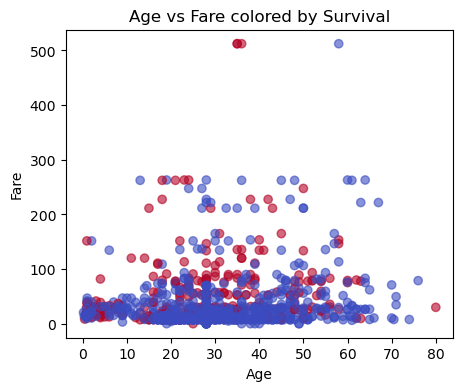

In [55]:
# --- Step 12: Visualization (optional) ---
plt.figure(figsize=(5, 4))
plt.scatter(df['age'], df['fare'], c=df['survived'], cmap='coolwarm', alpha=0.6)
plt.title("Age vs Fare colored by Survival")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()